<a href="https://colab.research.google.com/github/southjohn64/exercises/blob/main/reg_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import sklearn as sk
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import seaborn as sns
#k-nearest, regression-trees, linear regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Read data

In [174]:
X_TRAIN_PATH = '/content/gdrive/MyDrive/Colab Notebooks/data/X_train.csv'
Y_TRAIN_PATH = '/content/gdrive/MyDrive/Colab Notebooks/data/y_train.csv'
X_TEST_PATH = '/content/gdrive/MyDrive/Colab Notebooks/data/X_test.csv'

TRAIN

In [175]:
df_x_train_skills = pd.read_csv(X_TRAIN_PATH)
df_x_train_skills = df_x_train_skills[['Age', 'Gender', 'Education Level','Job Title', 'Years of Experience', 'Country', 'Race', 'height','weight', 'id', 'professionalism']]
df_x_train_skills.set_index('id',drop=True,inplace=True)
df_x_train_skills.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,professionalism
id,,,,,,,,,,
2477,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,1150.0
76,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,1100.0
64,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,26.0
924,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,279.0
242,39.0,F,bachelor,senior|product|manage,11.0,chin,Korean,1.794105,72.049210,380.0


In [176]:
df_x_train_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5363 entries, 2477 to 3572
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5359 non-null   float64
 1   Gender               5359 non-null   object 
 2   Education Level      5360 non-null   object 
 3   Job Title            5361 non-null   object 
 4   Years of Experience  5360 non-null   float64
 5   Country              5363 non-null   object 
 6   Race                 5363 non-null   object 
 7   height               5363 non-null   float64
 8   weight               5361 non-null   float64
 9   professionalism      5360 non-null   float64
dtypes: float64(5), object(5)
memory usage: 460.9+ KB


In [177]:
df_y_train_skills = pd.read_csv(Y_TRAIN_PATH,index_col=[0])
df_y_train_skills.head()

,Salary
2477,175966.0
76,160000.0
64,35000.0
924,195000.0
242,120000.0


Check for nan

In [178]:
df_y_train_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5363 entries, 2477 to 3572
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  5358 non-null   float64
dtypes: float64(1)
memory usage: 83.8 KB


array([[<Axes: title={'center': 'Salary'}>]], dtype=object)

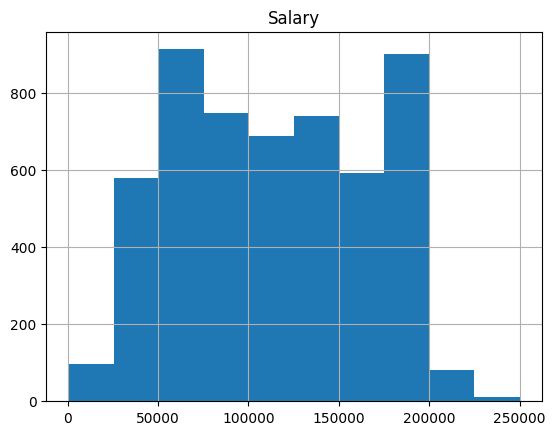

In [179]:
df_y_train_skills.hist()

TEST

In [180]:
df_x_test_skills = pd.read_csv(X_TEST_PATH)
df_x_test_skills = df_x_test_skills[['Age', 'Gender', 'Education Level','Job Title', 'Years of Experience', 'Country', 'Race', 'height','weight', 'id', 'professionalism']]
df_x_test_skills.set_index('id',drop=True,inplace=True)
df_x_test_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 6480 to 2506
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1341 non-null   float64
 1   Gender               1341 non-null   object 
 2   Education Level      1341 non-null   object 
 3   Job Title            1341 non-null   object 
 4   Years of Experience  1341 non-null   float64
 5   Country              1341 non-null   object 
 6   Race                 1341 non-null   object 
 7   height               1341 non-null   float64
 8   weight               1341 non-null   float64
 9   professionalism      1341 non-null   float64
dtypes: float64(5), object(5)
memory usage: 115.2+ KB


# IMPUTE

In [181]:
def impute_missing_values(df_train, df_test , remove_row_missing_cat_data):
  imputer_dict = {}
  if remove_row_missing_cat_data:
    for col in df_train.columns:
        if df_train[col].dtype != 'object': #number
          imp = SimpleImputer(strategy='mean')
          df_train[col] = imp.fit_transform(df_train[col].values.reshape(-1, 1))
          df_test[col] = imp.transform(df_test[col].values.reshape(-1, 1))
          imputer_dict[col] = imp
        else: #cat col
            df_train.dropna(subset=[col], inplace=True) #remove rows with miss in categorical col
            df_test
  else:
    for col in df_train.columns:
        if df_train[col].dtype == 'object':
          imp = SimpleImputer(strategy='most_frequent')

        else:
          imp = SimpleImputer(strategy='mean')
        df_train[col] = imp.fit_transform(df_train[col].values.reshape(-1, 1))
        df_test[col] = imp.transform(df_test[col].values.reshape(-1, 1))
        imputer_dict[col] = imp
  return df_train , df_test,imputer_dict

In [ ]:
# impute only continoues cols , remove rows
# df_x_train_skills_copy = df_x_train_skills.copy()
# df_x_test_skills_copy = df_x_test_skills.copy()

# df_x_train_skills_copy,df_x_test_skills_copy,_ = impute_missing_values(df_x_train_skills_copy,df_x_test_skills_copy,True)
# print(f'df_train_skills shape : {df_x_train_skills.shape} , after impute df_train_skills_copy shape : {df_x_train_skills_copy.shape}')
# print(f'df_test_skills_copy shape : {df_x_test_skills.shape} , after impute df_test_skills_copy shape : {df_x_test_skills_copy.shape}')
# print('*' *20)
# df_x_train_skills_copy.info()

In [ ]:
#impute all
# impute only continoues cols , remove rows
# df_x_train_skills_copy = df_x_train_skills.copy()
# df_x_test_skills_copy = df_x_test_skills.copy()

# df_x_train_skills_copy,df_x_test_skills_copy,_ = impute_missing_values(df_x_train_skills_copy,df_x_test_skills_copy,False)
# print(f'df_train_skills shape : {df_x_train_skills.shape} , after impute df_train_skills_copy shape : {df_x_train_skills_copy.shape}')
# print(f'df_test_skills_copy shape : {df_x_test_skills.shape} , after impute df_test_skills_copy shape : {df_x_test_skills_copy.shape}')
# print('*' *20)
# df_x_train_skills_copy.info()

# One hot encode

In [182]:
def one_hot_encode(df)
  #df_x_train_skills_copy_ZZZ = df.copy()
  cat_col = list(df.select_dtypes(include=['object']).columns)
  #print(cat_col)
  one_hot = pd.get_dummies(df, columns=cat_col)
  #print(one_hot)
  df.drop(cat_col,axis = 1, inplace=True)
  #print(df)
  df_new = pd.concat([df,one_hot],axis=1)
  #df_new.head()
  return df

# remove train Nan

PREPROCESS

In [185]:
#remove nan values  from train
na_filter = df_y_train_skills['Salary'].notna()
df_y_train_skills = df_y_train_skills[na_filter]
df_x_train_skills = df_x_train_skills[na_filter]


#IMPUTE
df_x_train_skills_copy = df_x_train_skills.copy()
df_x_test_skills_copy = df_x_test_skills.copy()
df_x_train_skills_copy,df_x_test_skills_copy, imputer_dict = impute_missing_values(df_x_train_skills_copy,df_x_test_skills_copy,False)

#ENCODE
df_x_train_skills_copy_encode = one_hot_encode(df_x_train_skills_copy)
df_x_test_skills_copy_encode = one_hot_encode(df_x_test_skills_copy)

In [187]:
df_x_test_skills_copy_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 6480 to 2506
Columns: 135 entries, Age to Race_White
dtypes: float64(10), uint8(125)
memory usage: 278.9 KB


# TRAIN

In [144]:
def knn_train(df_x_train, series_y_train,v_n_neighbors):
  knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
  #knn.fit(df_x_train_skills_copy_encode, df_y_train_skills['Salary'])
  knn.fit(df_x_train, series_y_train)
  return knn

In [119]:
def decision_tree_train(df_x_train,series_y_train):
  decision_tree = DecisionTreeRegressor(random_state=0)
  decision_tree.fit(df_x_train,series_y_train)
  return decision_tree

In [93]:
def lin_reg_train(df_x_train,series_y_train):
  lin_reg_model = LinearRegression()
  lin_reg_model.fit(df_x_train,series_y_train)
  return lin_reg_model

16349.742712072402

# run train and validate
took 10% from train for validation of the models

In [128]:
train_x, val_x,train_y, val_y = train_test_split(df_x_train_skills_copy_encode,df_y_train_skills, test_size=0.1)

save results here

In [ ]:
results_dict = {"model":[],
                "model_name":[],
                "model_config":[],
                "rmse_val":[],
                "rmse_test":[]}

knn search space on K

In [156]:
knn_values = range(3,11,2)
for knn_val in knn_values:
  knn_model = knn_train(train_x, train_y['Salary'],v_n_neighbors=knn_val)
  knn_model_name = f'knn_{knn_val}'

  y_pred = knn_model.predict(val_x)
  y_true = val_y['Salary']
  rmse_val = mean_squared_error(y_true, y_pred, squared=False)

  #save results
  results_dict['model'].append(knn_model)
  results_dict['model_name'].append('KNN')
  results_dict['model_config'].append(knn_model_name)
  results_dict['rmse_val'].append(rmse_val)

results_dict['rmse_test']=np.zeros_like(results_dict['rmse_val'],dtype=np.int32)
results_dict

{'model': [KNeighborsClassifier(n_neighbors=3),
  KNeighborsClassifier(),
  KNeighborsClassifier(n_neighbors=7),
  KNeighborsClassifier(n_neighbors=9)],
 'model_name': ['knn', 'knn', 'knn', 'knn'],
 'model_config': ['knn_3', 'knn_5', 'knn_7', 'knn_9'],
 'rmse_val': [26985.71650481019,
  26868.739223368077,
  27342.882617492163,
  28131.649947367005],
 'rmse_test': array([0, 0, 0, 0], dtype=int32)}

# TEST

In [ ]:
results_dict

In [168]:
for key, value in results_dict.items():
  print(key, '->', value)

model -> [KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(), KNeighborsClassifier(n_neighbors=7), KNeighborsClassifier(n_neighbors=9), KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(), KNeighborsClassifier(n_neighbors=7), KNeighborsClassifier(n_neighbors=9)]
model_name -> ['knn', 'knn', 'knn', 'knn', 'knn_TEST', 'knn_TEST', 'knn_TEST', 'knn_TEST']
model_config -> ['knn_3', 'knn_5', 'knn_7', 'knn_9', 'knn_3', 'knn_5', 'knn_7', 'knn_9']
rmse_val -> [26985.71650481019, 26868.739223368077, 27342.882617492163, 28131.649947367005, 26985.71650481019, 26868.739223368077, 27342.882617492163, 28131.649947367005]
rmse_test -> [0 0 0 0 0 0 0 0]


In [166]:
for model in results_dict.keys():
  print(model)

model
model_name
model_config
rmse_val
rmse_test


In [172]:
dict_test = {"id":[],'salary':[]}
models_arr = results_dict['model']
model = models_arr[0]
y_pred = model.predict(df_x_test_skills_copy_encode)

dict_test["id"] = list(df_x_test_skills_copy_encode.index)
dict_test["salary"] = y_pred

dict_test

ValueError: ignored

# RESULTS

In [ ]:
df_results = pd.DataFrame(results_dict)
df_results

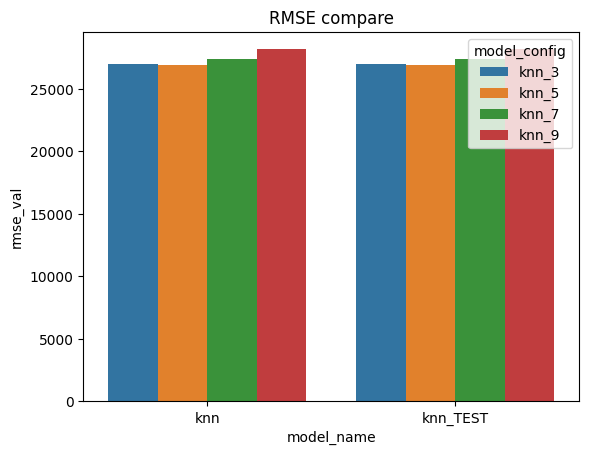

In [164]:
sns.barplot(df_results,x='model_name',y='rmse_val',hue='model_config').set_title("RMSE compare");